In [5]:
import pandas as pd
import numpy as np

In [6]:
concrete_data = pd.read_csv("concrete_data.csv")
concrete_data.head()


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
concrete_data.shape

(1030, 9)

In [8]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [10]:
target ="Strength"
X= concrete_data.copy()
y= X.pop(target)

In [11]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [12]:
n_cols = X.shape[1]
input_shape=(n_cols,)

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
from tensorflow import keras as K 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [15]:
def regression_model (network_arch, input_shape, optimizer ="adam", loss = "mean_squared_error",):
    model = Sequential()

    nlayers =len(network_arch)
    final_layer= "layer_" + str(nlayers)

    for k,layer in network_arch.items():
        n_units =layer.get("n_units")
        activation = layer.get("activation")
        if k == "layer_1":
            model.add(Dense(n_units, activation = activation, input_shape = input_shape))
        elif k == final_layer:
            model.add(Dense(n_units))
        else:
            model.add(Dense(n_units, activation = activation))

    model.compile(optimizer=optimizer, loss=loss)

    return model

In [16]:
model_architecture1 = {"layer_1": {"n_units": 10, "activation": "relu"}, "layer_2" :{"n_units": 1},}

print()
print("input_shape ={}".format(input_shape))
print("network_config ={}".format(model_architecture1))
print()


input_shape =(8,)
network_config ={'layer_1': {'n_units': 10, 'activation': 'relu'}, 'layer_2': {'n_units': 1}}



In [17]:
from sklearn.metrics import mean_squared_error


In [18]:
def train_and_test_several_models(X,y, test_size, model_arch, input_shape, optimizer, loss, niterations,epochs,pred_norm =False, seed = 345, verbose = 2,):
    metric_list = np.zeros(niterations)

    print()
    print("Launching {} iterations of".format(niterations))
    print(" - train/test split => test_size = {}".format(test_size))
    if pred_norm:
        print(" --Apply predictors normalization")
    else:
        print(" - NO predictors normalization")
    print(" - model architecture: {}".format(model_arch))
    print(" - model training:")
    print(" * epochs = {}".format(epochs))
    print(" * optimizer = {}".format(optimizer))
    print(" * loss = {}".format(loss))
    print()

    for i in range(niterations):
        myseed = seed + i*2
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=myseed)

        model = regression_model(network_arch= model_arch, input_shape= input_shape, optimizer=optimizer, loss=loss)
        if pred_norm:
            X_train_mean = X_train.mean()
            X_train_std = X_train.std()
            X_train = (X_train - X_train_mean)/X_train_std
            X_test =(X_test - X_train_mean)/X_train_std
        myverbose= 0
        if  i==0:
            myverbose = verbose
            print("Train/test splitting for iteration {}".format(i+1))
            print(" X_train.shape = {}".format(X_train.shape))
            print(" y_train.shape = {}".format(y_train.shape))
            print(" X_test.shape = {}".format(X_test.shape))
            print(" y_test.shape = {}".format(y_test.shape))
            print(X_train.head())
            print()
            print("Model summary for iteration {}".format(i+1))
            model.summary()
            print()
            print()

        model.fit(X_train, y_train, epochs= epochs, verbose=verbose)
        y_pred = model.predict(X_test)
        result = np.sqrt(mean_squared_error(y_test,y_pred))
        print("{}: sqrt(mse) = {}".format(i+1, result))
        metric_list[i] = result 
    print()

    return metric_list

In [19]:
niterations  = 50
test_size = 0.3

In [ ]:
sq_mse_list_A= train_and_test_several_models(X=X,
                                            y = y,
                                            test_size=test_size, 
                                            model_arch=model_architecture1, 
                                            input_shape=input_shape, 
                                            optimizer="adam", 
                                            loss= "mean_squared_error", 
                                            niterations= niterations, 
                                            epochs=50, 
                                            seed= 345, 
                                            verbose = 0, 
                                            pred_norm=False,)


In [21]:
mean_sqmse_A =np.mean(sq_mse_list_A)
std_sqmse_A = np.std(sq_mse_list_A)

df_results =pd.DataFrame.from_dict({"Part":["A"], "mean_sq_mse": [mean_sqmse_A], "std_sq_mse": [std_sqmse_A]})
df_results

,Part,mean_sq_mse,std_sq_mse
0,A,17.336088,11.546754


In [22]:
figsize= (10,8)
nbins = 20

In [23]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def plot_results(result_list,
                 label_list,
                 var_name="sq(mse)",
                 figsize=(15, 10),
                 nbins=10):
    if len(result_list) != len(label_list):
        raise ValueError("lengths of result_list and label_list has to be the same")
    
    if len(result_list) == 0:
        raise ValueError("lengths of result_list has to be >0")

    color_list = ["b", "r", "m", "y"]

    xmin = 1.0e+20
    xmax = -1.0e+20  # Correcting the initialization for xmax
    for arr in result_list:  # Correcting the typo here
        min_tmp = np.amin(arr)
        max_tmp = np.amax(arr)

        if xmin > min_tmp:
            xmin = min_tmp
        if xmax < max_tmp:
            xmax = max_tmp
    
    percent = .01
    delta = xmax - xmin
    xmin -= percent * delta
    xmax += percent * delta

    bins = np.linspace(xmin, xmax, nbins + 1)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)

    porcent = .05

    ymax = -1.0e+20
    for i, arr in enumerate(result_list):
        n, _, _ = ax.hist(x=arr,
                          bins=bins,
                          color=color_list[i],
                          alpha=0.5,
                          density=False,
                          label=label_list[i])
        if ymax < np.amax(n):
            ymax = np.amax(n)

    ax.legend()
    ax.set_xlim([bins[0], bins[-1]])
    ax.set_ylim([0, ymax * (1.0 + porcent)])
    ax.set_xlabel(var_name)
    ax.set_ylabel('occurrences')
    ax.set_title(var_name + ' distribution')

    fig.tight_layout()

    plt.show()


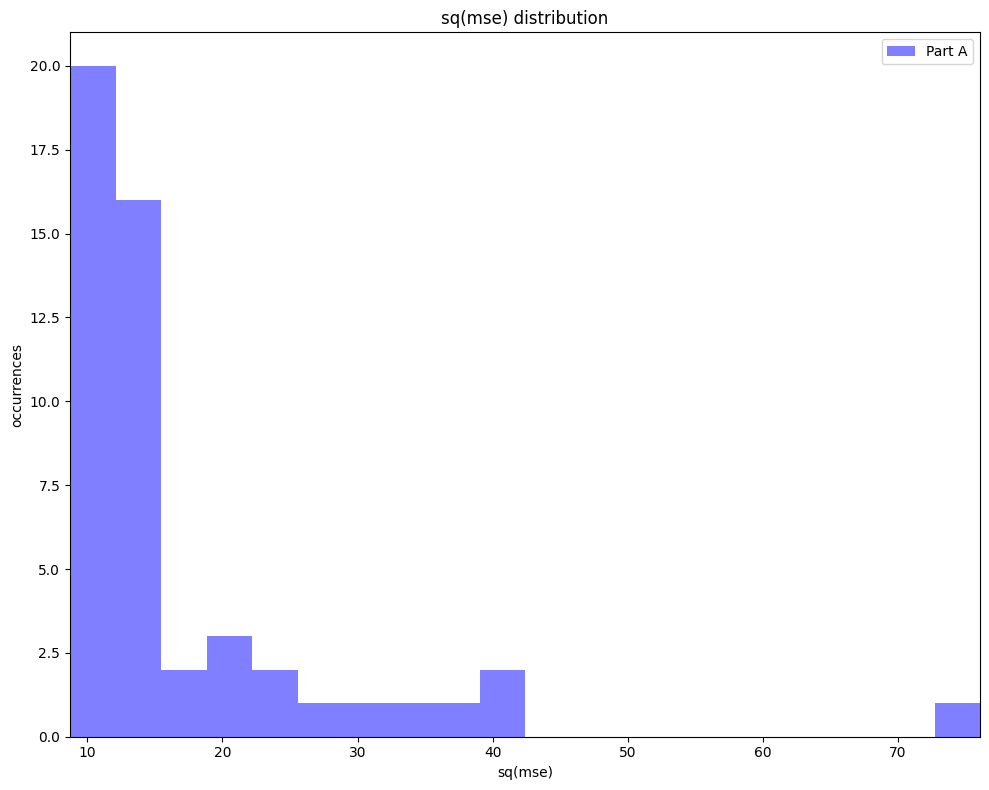

In [24]:
plot_results(result_list = [sq_mse_list_A],
            label_list =["Part A"],
            var_name="sq(mse)",
            figsize = figsize,
            nbins =nbins)

In [ ]:
sq_mse_list_B= train_and_test_several_models(X=X,
                                            y = y,
                                            test_size=test_size, 
                                            model_arch=model_architecture1, 
                                            input_shape=input_shape, 
                                            optimizer="adam", 
                                            loss= "mean_squared_error", 
                                            niterations= niterations, 
                                            epochs=50, 
                                            seed= 3675, 
                                            verbose = 0, 
                                            pred_norm=True,)

In [26]:
mean_sqmse_B =np.mean(sq_mse_list_B)
std_sqmse_B= np.std(sq_mse_list_B)

df_results.loc[df_results.shape[0]]= ["B", mean_sqmse_B,std_sqmse_B]
df_results

,Part,mean_sq_mse,std_sq_mse
0,A,17.336088,11.546754
1,B,18.938847,3.202697


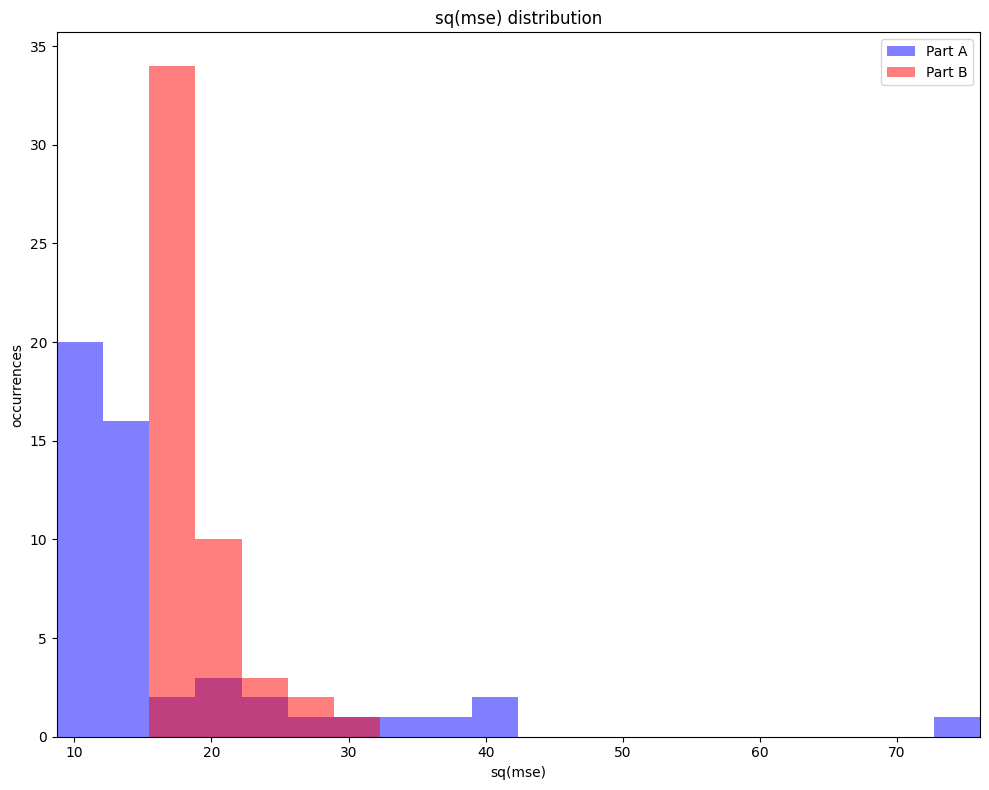

In [27]:
plot_results(result_list =[sq_mse_list_A, sq_mse_list_B],
                label_list =["Part A", "Part B"],
                var_name ="sq(mse)",
                figsize = figsize,
                nbins = nbins)
                


In [ ]:
sq_mse_list_C= train_and_test_several_models(X=X,
                                            y = y,
                                            test_size=test_size, 
                                            model_arch=model_architecture1, 
                                            input_shape=input_shape, 
                                            optimizer="adam", 
                                            loss= "mean_squared_error", 
                                            niterations= niterations, 
                                            epochs=100, 
                                            seed= 3675, 
                                            verbose = 0, 
                                            pred_norm=True,)

In [29]:
mean_sqmse_C =np.mean(sq_mse_list_C)
std_sqmse_C= np.std(sq_mse_list_C)

df_results.loc[df_results.shape[0]]= ["C", mean_sqmse_C,std_sqmse_C]
df_results

,Part,mean_sq_mse,std_sq_mse
0,A,17.336088,11.546754
1,B,18.938847,3.202697
2,C,12.822561,0.601512


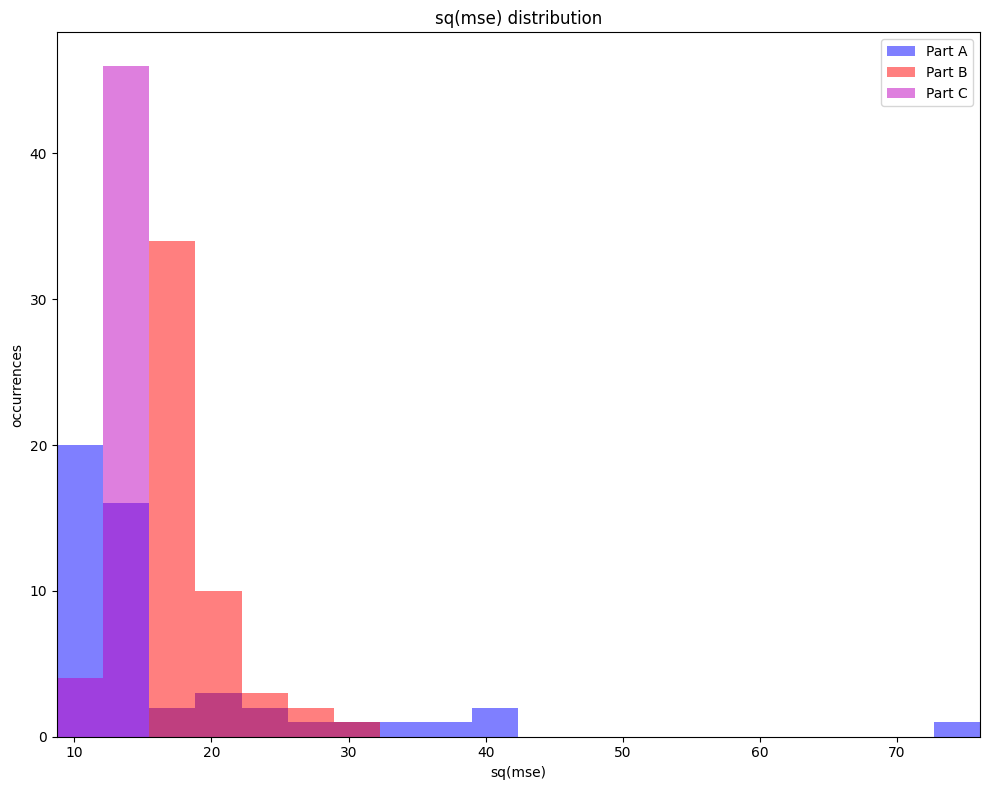

In [30]:
plot_results(result_list =[sq_mse_list_A, sq_mse_list_B, sq_mse_list_C],
                label_list =["Part A", "Part B", "Part C"],
                var_name ="sq(mse)",
                figsize = figsize,
                nbins = nbins)

In [31]:
model_architecture2 = {"layer_1": {"n_units": 10, "activation": "relu"},
                        "layer_2" :{"n_units": 10, "activation":"relu"},
                        "layer_3" :{"n_units": 10, "activation": "relu"},
                        "layer_4": {"n_units": 1},
                        }

print()
print("input_shape ={}".format(input_shape))
print("network_config ={}".format(model_architecture2))
print()


input_shape =(8,)
network_config ={'layer_1': {'n_units': 10, 'activation': 'relu'}, 'layer_2': {'n_units': 10, 'activation': 'relu'}, 'layer_3': {'n_units': 10, 'activation': 'relu'}, 'layer_4': {'n_units': 1}}



In [ ]:
sq_mse_list_D= train_and_test_several_models(X=X,
                                            y = y,
                                            test_size=test_size, 
                                            model_arch=model_architecture2, 
                                            input_shape=input_shape, 
                                            optimizer="adam", 
                                            loss= "mean_squared_error", 
                                            niterations= niterations, 
                                            epochs=50, 
                                            seed= 3675, 
                                            verbose = 0, 
                                            pred_norm=True,)

In [35]:
mean_sqmse_D=np.mean(sq_mse_list_D)
std_sqmse_D= np.std(sq_mse_list_D)

df_results.loc[df_results.shape[0]]= ["D", mean_sqmse_D,std_sqmse_D]
df_results

,Part,mean_sq_mse,std_sq_mse
0,A,17.336088,11.546754
1,B,18.938847,3.202697
2,C,12.822561,0.601512
3,D,18.974277,2.669669
4,D,11.324337,0.582673


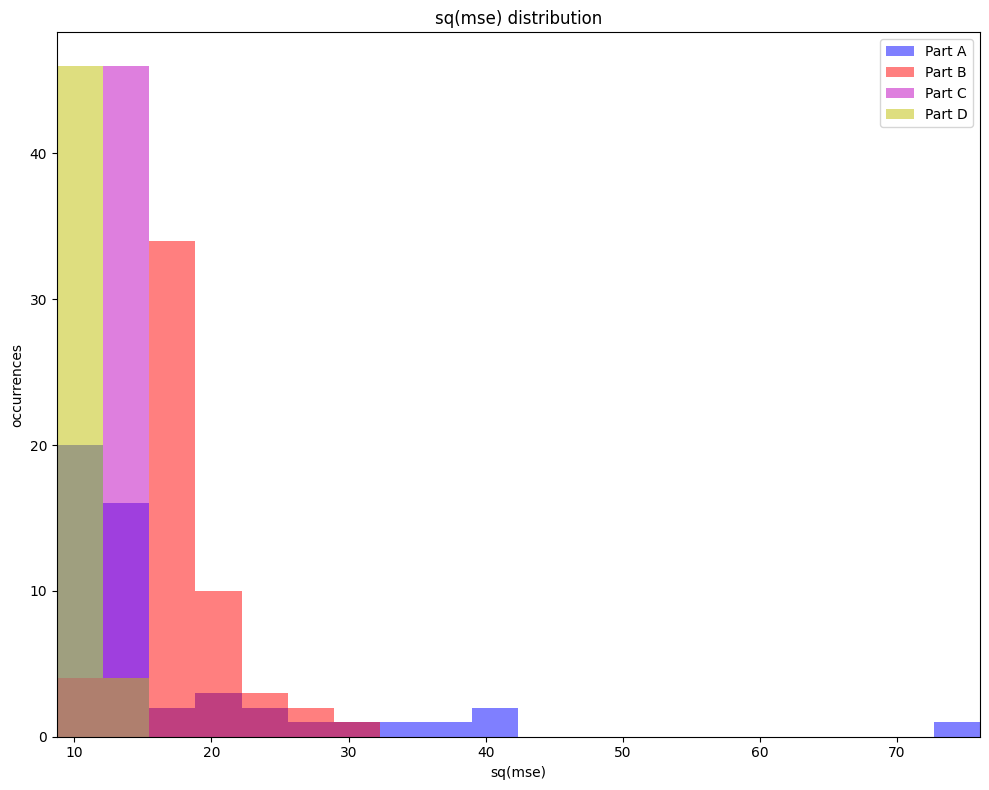

In [36]:
plot_results(result_list =[sq_mse_list_A, sq_mse_list_B, sq_mse_list_C,sq_mse_list_D],
                label_list =["Part A", "Part B", "Part C", "Part D"],
                var_name ="sq(mse)",
                figsize = figsize,
                nbins = nbins)